In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, SimpleRNN, Dropout, Lambda, LSTM, GRU, Bidirectional, Layer, Attention
from keras_self_attention import SeqSelfAttention
from sklearn.preprocessing import StandardScaler
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customers_in_a_Shop.csv', header=None)
df.head()

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [3]:
df.columns={"Date","Customers"}
print(df.isnull().sum())

Date         0
Customers    4
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m")
df = df.set_index('Date')
df

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,720.0


In [5]:
missing = df[df.isna().any(axis=1)]
print(missing)

            Customers
Date                 
1951-06-01        NaN
1951-07-01        NaN
1954-06-01        NaN
1960-03-01        NaN


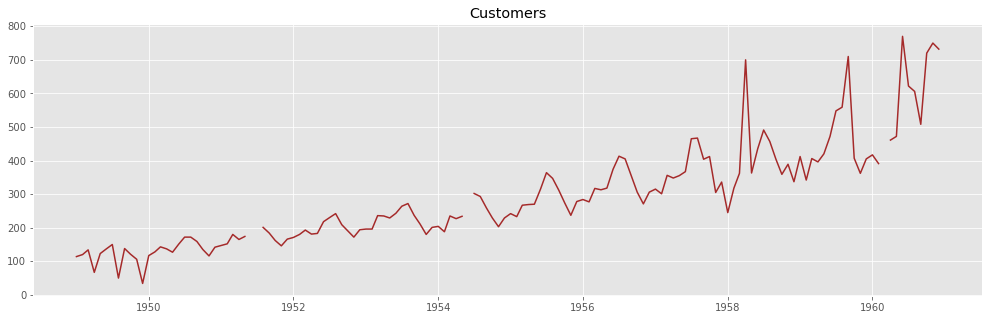

In [6]:
#from matplotlib import style
#print(plt.style.available)

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(17,5)

plt.plot(df, color='brown')
plt.title("Customers")
plt.show()

## Imputing missing values

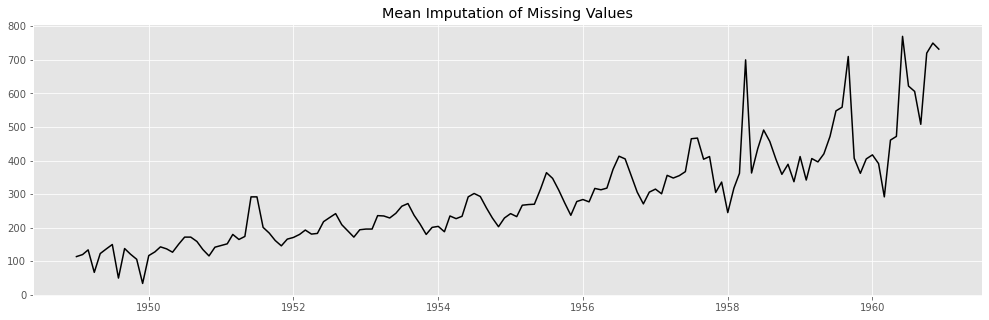

In [7]:
## Comparing several types of interpolations - mean 
plt.rcParams['figure.figsize']=(17,5)
df['Customers_mean'] = df['Customers'].fillna(df['Customers'].mean())
plt.plot(df['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

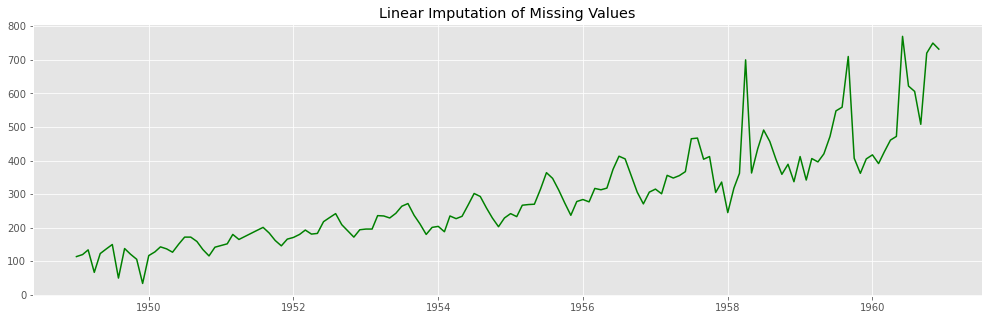

In [8]:
## Comparing several types of interpolations - linear
plt.rcParams['figure.figsize']=(17,5)
df['Customers_linear'] = df['Customers'].interpolate(method='linear')
plt.plot(df['Customers_linear'],color='green')
plt.title("Linear Imputation of Missing Values")
plt.show()

In [9]:
df1 = df['1949-06':'1960-06':12]
df1

,Customers,Customers_mean,Customers_linear
Date,,,
1949-06-01,137.0,137.000000,137.0
1950-06-01,151.0,151.000000,151.0
1951-06-01,NaN,291.878571,183.0
1952-06-01,218.0,218.000000,218.0
1953-06-01,243.0,243.000000,243.0
1954-06-01,NaN,291.878571,268.0
1955-06-01,315.0,315.000000,315.0
1956-06-01,374.0,374.000000,374.0
1957-06-01,367.0,367.000000,367.0


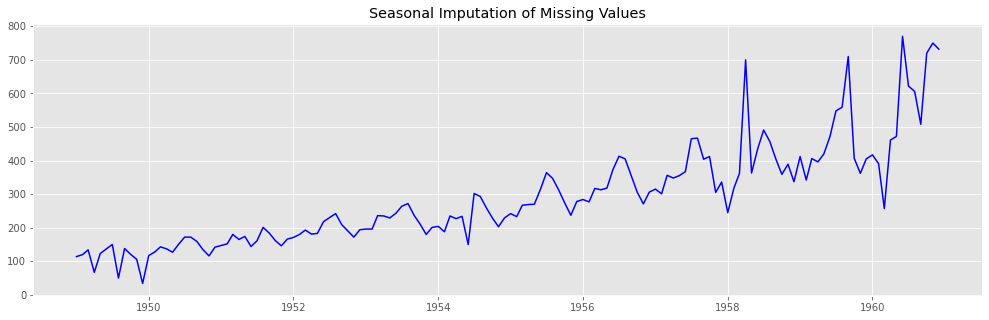

In [10]:
## Comparing several types of interpolations - seasonal interpolation
df.loc['1960-03'].fillna((df['1949-03':'1959-03':12].sum())/df['1949-03':'1959-03':12].shape[0], inplace=True)
df.loc['1954-06'].fillna((df['1949-06':'1953-06':12].sum())/(df['1949-06':'1953-06':12].shape[0]), inplace=True)
df.loc['1951-07'].fillna((df['1949-07':'1950-07':12].sum())/(df.loc['1949-07':'1950-07':12].shape[0]), inplace=True)
df.loc['1951-06'].fillna((df['1949-06':'1950-06':12].sum())/(df['1949-06':'1950-06':12].shape[0]), inplace=True)

plt.rcParams['figure.figsize']=(17,5)
plt.plot(df['Customers'],color='blue')
plt.title("Seasonal Imputation of Missing Values")
plt.show()

In [11]:
df['Customers'].sort_values(ascending=False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers, dtype: float64

## Normality plots 

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customers', ylabel='Density'>

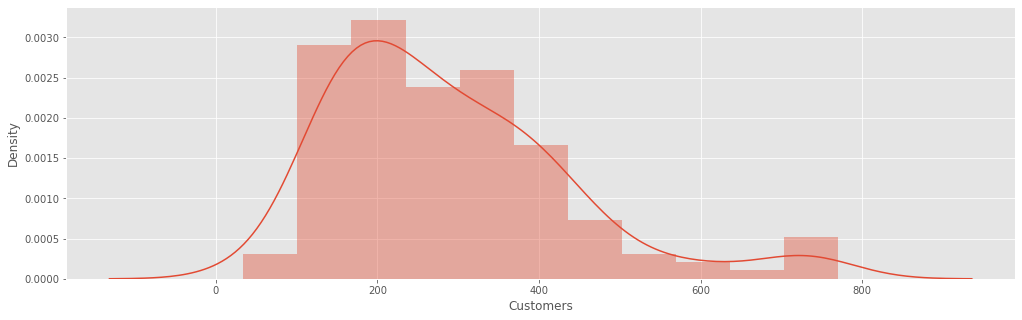

In [12]:
sns.distplot(df['Customers'])

((array([-2.58977345, -2.26833208, -2.08397164, -1.95134078, -1.84615093,
         -1.75813779, -1.68195358, -1.61444188, -1.55357684, -1.49797725,
         -1.44665728, -1.39888755, -1.35411252, -1.31189888, -1.27190175,
         -1.23384196, -1.19749012, -1.16265539, -1.12917712, -1.09691879,
         -1.06576327, -1.03560932, -1.00636876, -0.97796428, -0.95032771,
         -0.92339857, -0.89712296, -0.87145259, -0.84634402, -0.82175802,
         -0.797659  , -0.77401457, -0.75079515, -0.72797364, -0.70552513,
         -0.68342667, -0.66165704, -0.64019656, -0.61902697, -0.59813124,
         -0.57749349, -0.55709882, -0.53693331, -0.51698381, -0.49723799,
         -0.47768418, -0.45831134, -0.43910901, -0.42006725, -0.40117661,
         -0.38242807, -0.36381301, -0.34532319, -0.32695068, -0.30868788,
         -0.29052747, -0.27246238, -0.25448578, -0.23659106, -0.21877178,
         -0.2010217 , -0.18333474, -0.16570495, -0.14812651, -0.13059373,
         -0.11310101, -0.09564283, -0.

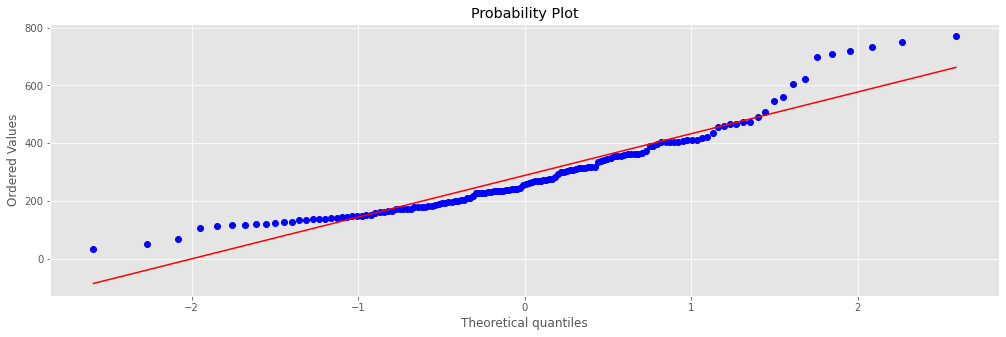

In [13]:
import scipy.stats
import pylab 
scipy.stats.probplot(df['Customers'],plot=pylab)
# pylab.show()

# Y-Axis: Data Value
# X-Axis: 

# Naive Decomposition
### Additive Seasonal Decomposition

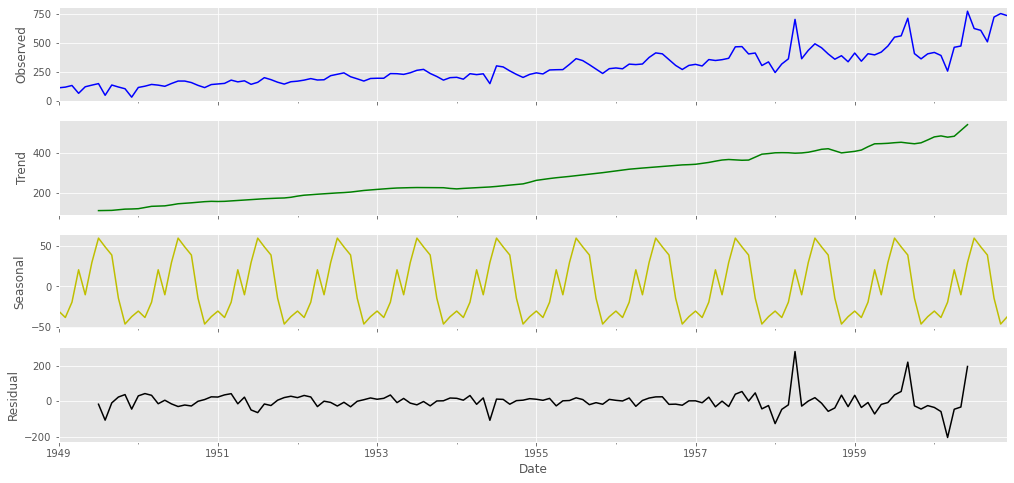

In [14]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(df['Customers'], model='additive')
#decomposition.plot()

fig, axes = plt.subplots(4, 1, sharex=True)

decomposition.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color='y')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')                           
plt.show()

### Multiplicative Seasonal Decomposition

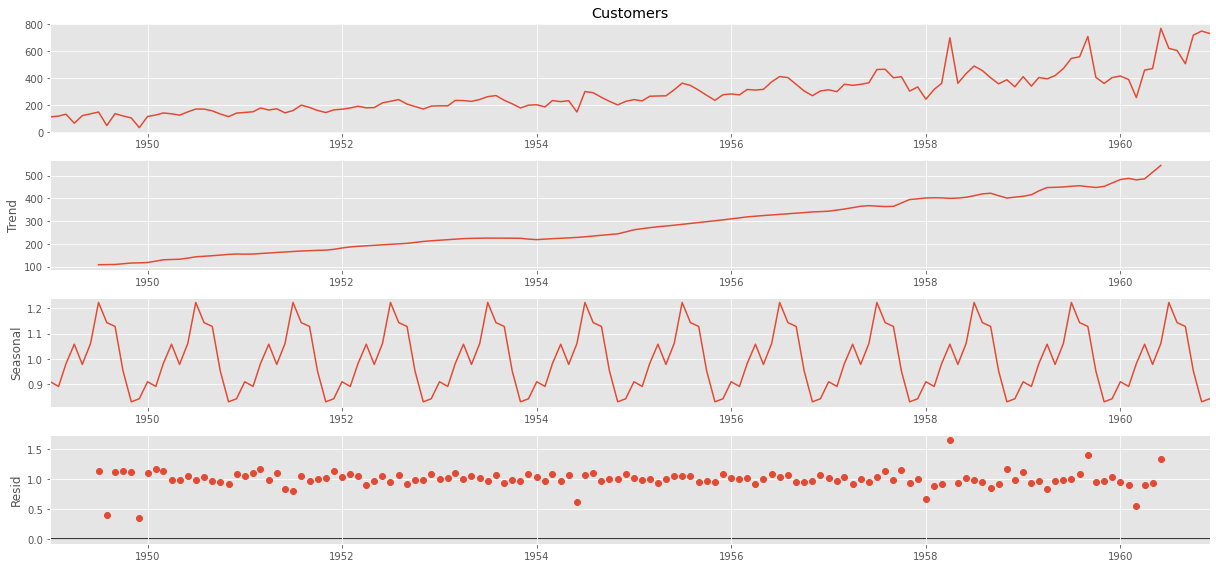

In [15]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(df['Customers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting Train and Test data

In [16]:
length = int(np.round(len(df["Customers_linear"])*0.8))
print(length)

115


In [17]:
df.drop(columns=["Customers_mean","Customers_linear"], inplace=True)
df.index.freq = 'MS'

In [18]:
## iF removing of the index is needed.
#df.reset_index(drop=True, inplace=True)
#df

In [19]:
train = df.iloc[:length,:]
train

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
...,...
1958-03-01,362.0
1958-04-01,700.0
1958-05-01,363.0


In [20]:
test = df.iloc[length:,: ]
test

,Customers
Date,
1958-08-01,457.000000
1958-09-01,404.000000
1958-10-01,359.000000
1958-11-01,389.000000
1958-12-01,337.000000
1959-01-01,412.000000
1959-02-01,342.000000
1959-03-01,406.000000
1959-04-01,396.000000


In [21]:
print(test.shape)
print(train.shape)

(29, 1)
(115, 1)


In [22]:
SC = StandardScaler()
train = SC.fit_transform(train)
test = SC.transform(test)
train

array([[-1.21245702],
       [-1.15425422],
       [-1.0184477 ],
       [-1.66837891],
       [-1.12515282],
       [-0.9893463 ],
       [-0.86324024],
       [-1.83328683],
       [-0.97964583],
       [-1.14455375],
       [-1.29006074],
       [-1.98849429],
       [-1.18335562],
       [-1.07665049],
       [-0.9311435 ],
       [-0.9893463 ],
       [-1.08635096],
       [-0.85353978],
       [-0.64982999],
       [-0.64982999],
       [-0.77593605],
       [-1.00874723],
       [-1.19305608],
       [-0.94084397],
       [-0.89234164],
       [-0.84383931],
       [-0.57222627],
       [-0.71773325],
       [-0.63042906],
       [-0.92144304],
       [-0.75653512],
       [-0.36851648],
       [-0.5334244 ],
       [-0.74683465],
       [-0.90204211],
       [-0.70803279],
       [-0.65953046],
       [-0.57222627],
       [-0.44612021],
       [-0.5625258 ],
       [-0.54312487],
       [-0.20360856],
       [-0.08720297],
       [ 0.02920262],
       [-0.29091276],
       [-0

In [23]:
train.shape

(115, 1)

## Long Short-Term Memory (LSTM) with Attention

### Change Data to RNN Architecture

In [24]:
stepsize = 18 #Should be optimized!

def RNN_Structure(df, stepsize):
    X =[]
    Y =[]
    
    for n in range(len(df) - stepsize):
        z = n + stepsize
        X.append(df[n:z,]) #sample =10
        Y.append(df[z,])   #sample = 11 is your label
        
    return np.array(X) , np.array(Y)

        
X_train ,Y_train =  RNN_Structure(train, stepsize)
X_test  , Y_test =  RNN_Structure(test, stepsize)

In [25]:
print(X_train.shape) # X_train value with step = 10
print(X_test.shape)  # X_Test value with step = 10
print(Y_train.shape) # X_train value with step = 10
print(Y_test.shape)  # X_Test value with step = 10

(97, 18, 1)
(11, 18, 1)
(97, 1)
(11, 1)


* First Argument: Sample size
* Second Argument: Time Step
* Third Argument: Number of Feature

**(Sample size, Step Lenght/Sequence Lenght, Number of Input Feature/ Input Value to RNN)**

In [26]:
## Not necessary for this series, since already done in the previous definition function. But in case:

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_train.shape)
# print(X_test.shape)

In [27]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

### Simple RNN

In [29]:
model = Sequential()
model.add(SimpleRNN(units=512, return_sequences=True, activation ="LeakyReLU"))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(SimpleRNN(units=64, return_sequences=False, activation ="LeakyReLU"))
model.add(Dense(32, activation="LeakyReLU"))
model.add(Dense(32, activation="LeakyReLU"))
model.add(Dense(1, activation="LeakyReLU"))
model.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")

In [30]:
memory = model.fit(X_train, Y_train , epochs = 500, batch_size = 100, verbose = 1)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.7246 - logcosh: 0.3238
Epoch 2/500
1/1 [==============================] - 0s 85ms/step - loss: 0.5639 - logcosh: 0.2214
Epoch 3/500
1/1 [==============================] - 0s 74ms/step - loss: 0.3946 - logcosh: 0.1269
Epoch 4/500
1/1 [==============================] - 0s 75ms/step - loss: 0.6379 - logcosh: 0.2782
Epoch 5/500
1/1 [==============================] - 0s 80ms/step - loss: 0.3529 - logcosh: 0.1120
Epoch 6/500
1/1 [==============================] - 0s 77ms/step - loss: 0.3932 - logcosh: 0.1275
Epoch 7/500
1/1 [==============================] - 0s 78ms/step - loss: 0.4253 - logcosh: 0.1471
Epoch 8/500
1/1 [==============================] - 0s 79ms/step - loss: 0.4274 - logcosh: 0.1495
Epoch 9/500
1/1 [==============================] - 0s 78ms/step - loss: 0.4093 - logcosh: 0.1434
Epoch 10/500
1/1 [==============================] - 0s 76ms/step - loss: 0.3843 - logcosh: 0.1334
Epoch 11/500
1/1 [=============

1/1 [==============================] - 0s 77ms/step - loss: 0.0792 - logcosh: 0.0133
Epoch 168/500
1/1 [==============================] - 0s 79ms/step - loss: 0.0879 - logcosh: 0.0123
Epoch 169/500
1/1 [==============================] - 0s 74ms/step - loss: 0.1167 - logcosh: 0.0147
Epoch 170/500
1/1 [==============================] - 0s 78ms/step - loss: 0.0765 - logcosh: 0.0104
Epoch 171/500
1/1 [==============================] - 0s 74ms/step - loss: 0.0874 - logcosh: 0.0129
Epoch 172/500
1/1 [==============================] - 0s 76ms/step - loss: 0.1160 - logcosh: 0.0175
Epoch 173/500
1/1 [==============================] - 0s 79ms/step - loss: 0.1127 - logcosh: 0.0186
Epoch 174/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0906 - logcosh: 0.0127
Epoch 175/500
1/1 [==============================] - 0s 77ms/step - loss: 0.1325 - logcosh: 0.0209
Epoch 176/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0961 - logcosh: 0.0110
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 99ms/step - loss: 0.0471 - logcosh: 0.0074
Epoch 332/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0654 - logcosh: 0.0088
Epoch 333/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0461 - logcosh: 0.0069
Epoch 334/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0578 - logcosh: 0.0074
Epoch 335/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0493 - logcosh: 0.0067
Epoch 336/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0682 - logcosh: 0.0095
Epoch 337/500
1/1 [==============================] - 0s 96ms/step - loss: 0.0449 - logcosh: 0.0068
Epoch 338/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0613 - logcosh: 0.0073
Epoch 339/500
1/1 [==============================] - 0s 96ms/step - loss: 0.0507 - logcosh: 0.0070
Epoch 340/500
1/1 [==============================] - 0s 92ms/step - loss: 0.0447 - logcosh: 0.0073
Epoch 341/500
1/1 [====

1/1 [==============================] - 0s 94ms/step - loss: 0.0552 - logcosh: 0.0068
Epoch 496/500
1/1 [==============================] - 0s 101ms/step - loss: 0.0523 - logcosh: 0.0070
Epoch 497/500
1/1 [==============================] - 0s 92ms/step - loss: 0.0540 - logcosh: 0.0073
Epoch 498/500
1/1 [==============================] - 0s 105ms/step - loss: 0.0452 - logcosh: 0.0068
Epoch 499/500
1/1 [==============================] - 0s 92ms/step - loss: 0.0450 - logcosh: 0.0061
Epoch 500/500
1/1 [==============================] - 0s 93ms/step - loss: 0.0428 - logcosh: 0.0060


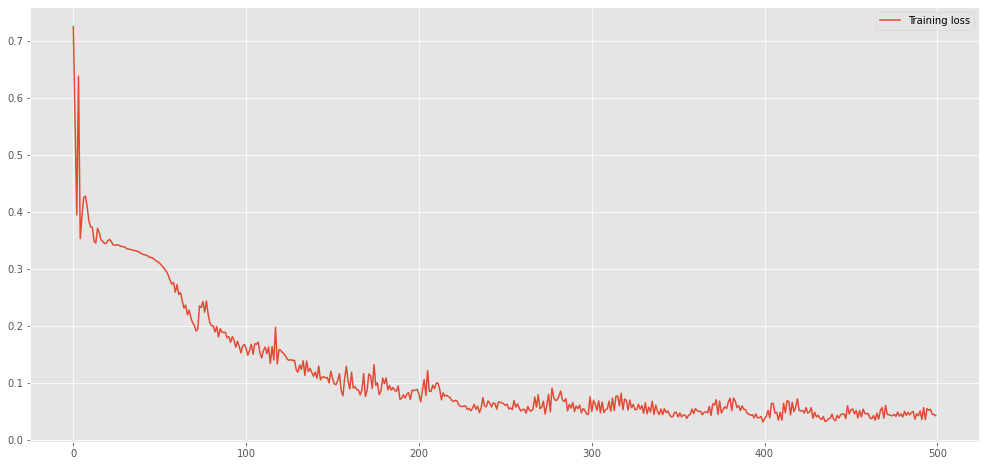

In [31]:
Loss_func = memory.history["loss"]
plt.plot(Loss_func, label= "Training loss")
plt.legend()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 18, 512)           263168    
_________________________________________________________________
seq_self_attention (SeqSelfA (None, None, 512)         32833     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                36928     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 336,098
Trainable params: 336,098
Non-trainable params: 0
__________________________________________________

In [33]:
score = model.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh

[0.05351117625832558, 0.006648603361099958]

In [34]:
#X_train = np.reshape(X_train, (-1,1))
#X_test = np.reshape(X_test, (-1,1))
print(X_train.shape)
print(X_test.shape)

(97, 18, 1)
(11, 18, 1)


In [35]:
X_test

array([[[2.1148028 ],
        [1.6006781 ],
        [1.1641572 ],
        [1.4551711 ],
        [0.9507469 ],
        [1.6782818 ],
        [0.9992492 ],
        [1.620079  ],
        [1.5230744 ],
        [1.7558856 ],
        [2.2603097 ],
        [2.9975452 ],
        [3.1042504 ],
        [4.5690207 ],
        [1.6297795 ],
        [1.1932585 ],
        [1.6103785 ],
        [1.7267841 ]],

       [[1.6006781 ],
        [1.1641572 ],
        [1.4551711 ],
        [0.9507469 ],
        [1.6782818 ],
        [0.9992492 ],
        [1.620079  ],
        [1.5230744 ],
        [1.7558856 ],
        [2.2603097 ],
        [2.9975452 ],
        [3.1042504 ],
        [4.5690207 ],
        [1.6297795 ],
        [1.1932585 ],
        [1.6103785 ],
        [1.7267841 ],
        [1.4745721 ]],

       [[1.1641572 ],
        [1.4551711 ],
        [0.9507469 ],
        [1.6782818 ],
        [0.9992492 ],
        [1.620079  ],
        [1.5230744 ],
        [1.7558856 ],
        [2.2603097 ],
      

In [36]:
pred_train = SC.inverse_transform(model.predict(X_train))
pred_test = SC.inverse_transform(model.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

In [38]:
pred

,0
0,172.827835
1,174.140564
2,159.360794
3,136.867813
4,122.839394
...,...
103,689.062988
104,732.182617
105,533.275696
106,459.753387


In [39]:
df.reset_index(inplace=True, drop=True)
df

,Customers
0,114.0
1,120.0
2,134.0
3,67.0
4,123.0
...,...
139,606.0
140,508.0
141,720.0
142,750.0


<function matplotlib.pyplot.show(close=None, block=None)>

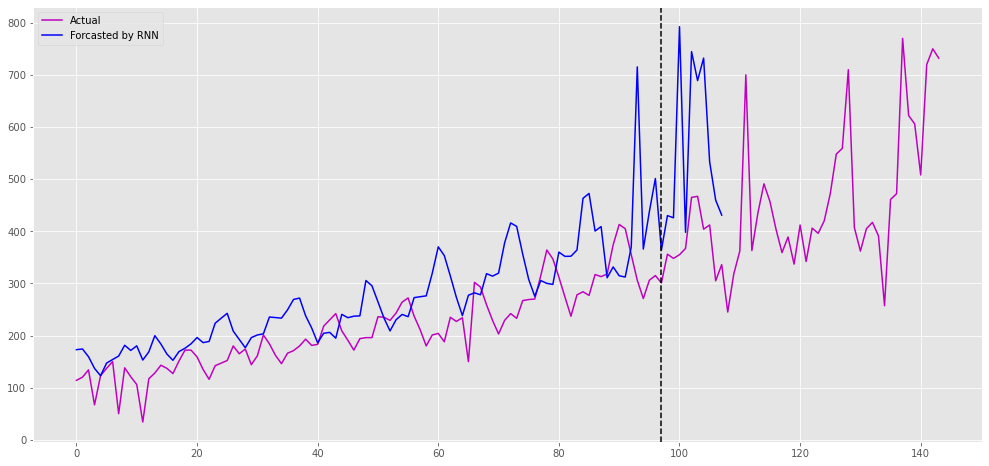

In [40]:
plt.plot(df, color="m")
plt.plot(pred, color="blue")
plt.legend(["Actual","Forcasted by RNN"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show

### Long-Short Term Memory (LSTM)

In [42]:
lstm = Sequential()
lstm.add(LSTM(units=512, return_sequences=True, activation ="LeakyReLU"))
lstm.add(SeqSelfAttention(attention_activation='sigmoid'))
lstm.add(LSTM(units=64, return_sequences=False, activation ="LeakyReLU"))
lstm.add(Dense(32, activation="LeakyReLU"))
lstm.add(Dense(32, activation="LeakyReLU"))
lstm.add(Dense(1, activation="LeakyReLU"))
lstm.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_lstm = lstm.fit(X_train, Y_train , epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
2/2 [==============================] - 4s 135ms/step - loss: 0.6986 - logcosh: 0.3106
Epoch 2/500
2/2 [==============================] - 0s 128ms/step - loss: 0.6775 - logcosh: 0.2973
Epoch 3/500
2/2 [==============================] - 0s 133ms/step - loss: 0.6390 - logcosh: 0.2724
Epoch 4/500
2/2 [==============================] - 0s 130ms/step - loss: 0.5327 - logcosh: 0.2146
Epoch 5/500
2/2 [==============================] - 0s 131ms/step - loss: 0.5403 - logcosh: 0.2093
Epoch 6/500
2/2 [==============================] - 0s 128ms/step - loss: 0.3885 - logcosh: 0.1249
Epoch 7/500
2/2 [==============================] - 0s 136ms/step - loss: 0.4220 - logcosh: 0.1350
Epoch 8/500
2/2 [==============================] - 0s 138ms/step - loss: 0.4289 - logcosh: 0.1355
Epoch 9/500
2/2 [==============================] - 0s 131ms/step - loss: 0.4178 - logcosh: 0.1269
Epoch 10/500
2/2 [==============================] - 0s 144ms/step - loss: 0.4091 - logcosh: 0.1233
Epoch 11/500
2/2 [=

2/2 [==============================] - 0s 224ms/step - loss: 0.2326 - logcosh: 0.0614
Epoch 166/500
2/2 [==============================] - 0s 190ms/step - loss: 0.2285 - logcosh: 0.0586
Epoch 167/500
2/2 [==============================] - 0s 193ms/step - loss: 0.2440 - logcosh: 0.0628
Epoch 168/500
2/2 [==============================] - 0s 199ms/step - loss: 0.2504 - logcosh: 0.0636
Epoch 169/500
2/2 [==============================] - 0s 183ms/step - loss: 0.2446 - logcosh: 0.0617
Epoch 170/500
2/2 [==============================] - 0s 185ms/step - loss: 0.2432 - logcosh: 0.0613
Epoch 171/500
2/2 [==============================] - 0s 194ms/step - loss: 0.2413 - logcosh: 0.0605
Epoch 172/500
2/2 [==============================] - 0s 182ms/step - loss: 0.2364 - logcosh: 0.0606
Epoch 173/500
2/2 [==============================] - 0s 198ms/step - loss: 0.2316 - logcosh: 0.0610
Epoch 174/500
2/2 [==============================] - 0s 184ms/step - loss: 0.2322 - logcosh: 0.0625
Epoch 175/500


2/2 [==============================] - 0s 168ms/step - loss: 0.2072 - logcosh: 0.0521
Epoch 248/500
2/2 [==============================] - 0s 154ms/step - loss: 0.1929 - logcosh: 0.0479
Epoch 249/500
2/2 [==============================] - 0s 171ms/step - loss: 0.1989 - logcosh: 0.0488
Epoch 250/500
2/2 [==============================] - 0s 165ms/step - loss: 0.1845 - logcosh: 0.0476
Epoch 251/500
2/2 [==============================] - 0s 161ms/step - loss: 0.1731 - logcosh: 0.0465
Epoch 252/500
2/2 [==============================] - 0s 168ms/step - loss: 0.1770 - logcosh: 0.0491
Epoch 253/500
2/2 [==============================] - 0s 179ms/step - loss: 0.1585 - logcosh: 0.0447
Epoch 254/500
2/2 [==============================] - 0s 161ms/step - loss: 0.1789 - logcosh: 0.0461
Epoch 255/500
2/2 [==============================] - 0s 164ms/step - loss: 0.1652 - logcosh: 0.0419
Epoch 256/500
2/2 [==============================] - 0s 171ms/step - loss: 0.1649 - logcosh: 0.0414
Epoch 257/500


2/2 [==============================] - 0s 163ms/step - loss: 0.1456 - logcosh: 0.0385
Epoch 330/500
2/2 [==============================] - 0s 162ms/step - loss: 0.1628 - logcosh: 0.0392
Epoch 331/500
2/2 [==============================] - 0s 155ms/step - loss: 0.1350 - logcosh: 0.0342
Epoch 332/500
2/2 [==============================] - 0s 158ms/step - loss: 0.1308 - logcosh: 0.0350
Epoch 333/500
2/2 [==============================] - 0s 157ms/step - loss: 0.1357 - logcosh: 0.0358
Epoch 334/500
2/2 [==============================] - 0s 165ms/step - loss: 0.1246 - logcosh: 0.0336
Epoch 335/500
2/2 [==============================] - 0s 161ms/step - loss: 0.1266 - logcosh: 0.0343
Epoch 336/500
2/2 [==============================] - 0s 161ms/step - loss: 0.1286 - logcosh: 0.0337
Epoch 337/500
2/2 [==============================] - 0s 158ms/step - loss: 0.1301 - logcosh: 0.0339
Epoch 338/500
2/2 [==============================] - 0s 157ms/step - loss: 0.1373 - logcosh: 0.0348
Epoch 339/500


2/2 [==============================] - 0s 168ms/step - loss: 0.1562 - logcosh: 0.0387
Epoch 412/500
2/2 [==============================] - 0s 168ms/step - loss: 0.1220 - logcosh: 0.0319
Epoch 413/500
2/2 [==============================] - 0s 186ms/step - loss: 0.1507 - logcosh: 0.0399
Epoch 414/500
2/2 [==============================] - 0s 172ms/step - loss: 0.1288 - logcosh: 0.0347
Epoch 415/500
2/2 [==============================] - 0s 170ms/step - loss: 0.1380 - logcosh: 0.0332
Epoch 416/500
2/2 [==============================] - 0s 167ms/step - loss: 0.1336 - logcosh: 0.0327
Epoch 417/500
2/2 [==============================] - 0s 177ms/step - loss: 0.1204 - logcosh: 0.0307
Epoch 418/500
2/2 [==============================] - 0s 172ms/step - loss: 0.1261 - logcosh: 0.0335
Epoch 419/500
2/2 [==============================] - 0s 165ms/step - loss: 0.1287 - logcosh: 0.0347
Epoch 420/500
2/2 [==============================] - 0s 164ms/step - loss: 0.1088 - logcosh: 0.0309
Epoch 421/500


2/2 [==============================] - 0s 157ms/step - loss: 0.0853 - logcosh: 0.0233
Epoch 494/500
2/2 [==============================] - 0s 156ms/step - loss: 0.1001 - logcosh: 0.0262
Epoch 495/500
2/2 [==============================] - 0s 158ms/step - loss: 0.0948 - logcosh: 0.0250
Epoch 496/500
2/2 [==============================] - 0s 159ms/step - loss: 0.0845 - logcosh: 0.0237
Epoch 497/500
2/2 [==============================] - 0s 160ms/step - loss: 0.0838 - logcosh: 0.0223
Epoch 498/500
2/2 [==============================] - 0s 152ms/step - loss: 0.1032 - logcosh: 0.0268
Epoch 499/500
2/2 [==============================] - 0s 158ms/step - loss: 0.0815 - logcosh: 0.0235
Epoch 500/500
2/2 [==============================] - 0s 160ms/step - loss: 0.0982 - logcosh: 0.0237


In [43]:
pred_train = SC.inverse_transform(lstm.predict(X_train))
pred_test = SC.inverse_transform(lstm.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

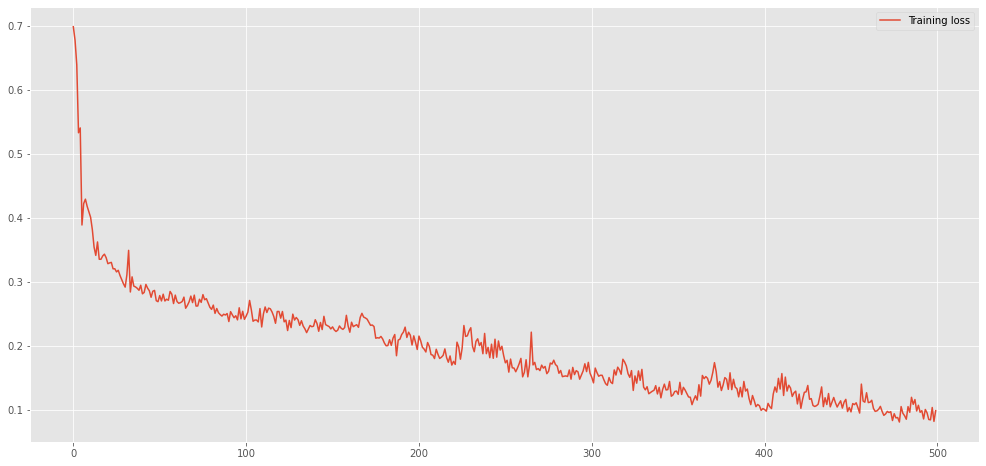

In [44]:
Loss_func = memory_lstm.history["loss"]
plt.plot(Loss_func, label= "Training loss")
plt.legend()

In [45]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 18, 512)           1052672   
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, None, 512)         32833     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                147712    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,236,386
Trainable params: 1,236,386
Non-trainable params: 0
____________________________________________

In [46]:
score = lstm.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh                  #Question: Why is the RNN's performance better than LSTM?!

[0.09391844272613525, 0.023738037794828415]

<function matplotlib.pyplot.show(close=None, block=None)>

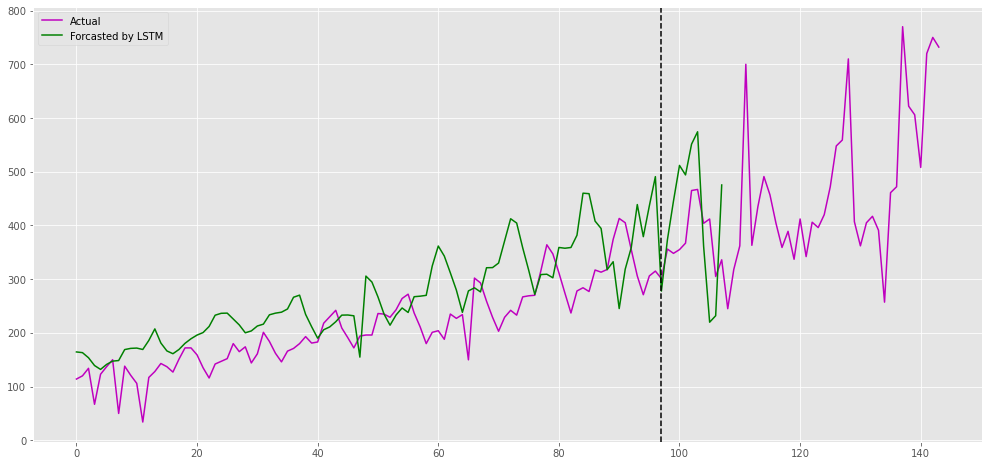

In [47]:
plt.plot(df, color="m")
plt.plot(pred, color="green")
plt.legend(["Actual","Forcasted by LSTM"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show #RNN still works better compared with LSTM even with the attention layer! (Why?)

### Bi-LSTM

In [54]:
bilstm = Sequential()
bilstm.add(Bidirectional(LSTM(units=512, return_sequences=True, activation ="LeakyReLU")))
bilstm.add(SeqSelfAttention(attention_activation='sigmoid'))
bilstm.add(Bidirectional(LSTM(units=64, return_sequences=False, activation ="LeakyReLU")))
bilstm.add(Dense(32, activation="LeakyReLU"))
bilstm.add(Dense(32, activation="LeakyReLU"))
bilstm.add(Dense(1, activation="LeakyReLU"))
bilstm.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_bilstm = bilstm.fit(X_train, Y_train , epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
2/2 [==============================] - 6s 251ms/step - loss: 0.6940 - logcosh: 0.3069
Epoch 2/500
2/2 [==============================] - 1s 252ms/step - loss: 0.6373 - logcosh: 0.2652
Epoch 3/500
2/2 [==============================] - 1s 253ms/step - loss: 0.5301 - logcosh: 0.1992
Epoch 4/500
2/2 [==============================] - 1s 257ms/step - loss: 0.4392 - logcosh: 0.1443
Epoch 5/500
2/2 [==============================] - 1s 255ms/step - loss: 0.3659 - logcosh: 0.1160
Epoch 6/500
2/2 [==============================] - 1s 254ms/step - loss: 0.3417 - logcosh: 0.1032
Epoch 7/500
2/2 [==============================] - 1s 252ms/step - loss: 0.3546 - logcosh: 0.1051
Epoch 8/500
2/2 [==============================] - 1s 286ms/step - loss: 0.3490 - logcosh: 0.1023
Epoch 9/500
2/2 [==============================] - 1s 256ms/step - loss: 0.3352 - logcosh: 0.1013
Epoch 10/500
2/2 [==============================] - 1s 256ms/step - loss: 0.3466 - logcosh: 0.1056
Epoch 11/500
2/2 [=

2/2 [==============================] - 1s 336ms/step - loss: 0.1511 - logcosh: 0.0400
Epoch 166/500
2/2 [==============================] - 1s 333ms/step - loss: 0.1575 - logcosh: 0.0425
Epoch 167/500
2/2 [==============================] - 1s 315ms/step - loss: 0.1658 - logcosh: 0.0445
Epoch 168/500
2/2 [==============================] - 1s 331ms/step - loss: 0.1658 - logcosh: 0.0414
Epoch 169/500
2/2 [==============================] - 1s 323ms/step - loss: 0.1620 - logcosh: 0.0431
Epoch 170/500
2/2 [==============================] - 1s 319ms/step - loss: 0.1754 - logcosh: 0.0443
Epoch 171/500
2/2 [==============================] - 1s 331ms/step - loss: 0.1760 - logcosh: 0.0434
Epoch 172/500
2/2 [==============================] - 1s 338ms/step - loss: 0.1851 - logcosh: 0.0458
Epoch 173/500
2/2 [==============================] - 1s 328ms/step - loss: 0.1701 - logcosh: 0.0423
Epoch 174/500
2/2 [==============================] - 1s 317ms/step - loss: 0.1639 - logcosh: 0.0427
Epoch 175/500


2/2 [==============================] - 1s 334ms/step - loss: 0.1596 - logcosh: 0.0439
Epoch 248/500
2/2 [==============================] - 1s 336ms/step - loss: 0.1632 - logcosh: 0.0420
Epoch 249/500
2/2 [==============================] - 1s 323ms/step - loss: 0.1539 - logcosh: 0.0399
Epoch 250/500
2/2 [==============================] - 1s 337ms/step - loss: 0.1524 - logcosh: 0.0407
Epoch 251/500
2/2 [==============================] - 1s 332ms/step - loss: 0.1554 - logcosh: 0.0390
Epoch 252/500
2/2 [==============================] - 1s 330ms/step - loss: 0.1505 - logcosh: 0.0388
Epoch 253/500
2/2 [==============================] - 1s 330ms/step - loss: 0.1527 - logcosh: 0.0398
Epoch 254/500
2/2 [==============================] - 1s 330ms/step - loss: 0.1564 - logcosh: 0.0392
Epoch 255/500
2/2 [==============================] - 1s 321ms/step - loss: 0.1549 - logcosh: 0.0390
Epoch 256/500
2/2 [==============================] - 1s 317ms/step - loss: 0.1419 - logcosh: 0.0376
Epoch 257/500


2/2 [==============================] - 1s 321ms/step - loss: 0.1306 - logcosh: 0.0329
Epoch 330/500
2/2 [==============================] - 1s 327ms/step - loss: 0.1247 - logcosh: 0.0295
Epoch 331/500
2/2 [==============================] - 1s 325ms/step - loss: 0.1169 - logcosh: 0.0278
Epoch 332/500
2/2 [==============================] - 1s 322ms/step - loss: 0.1165 - logcosh: 0.0272
Epoch 333/500
2/2 [==============================] - 1s 339ms/step - loss: 0.1194 - logcosh: 0.0251
Epoch 334/500
2/2 [==============================] - 1s 326ms/step - loss: 0.1281 - logcosh: 0.0279
Epoch 335/500
2/2 [==============================] - 1s 329ms/step - loss: 0.1100 - logcosh: 0.0210
Epoch 336/500
2/2 [==============================] - 1s 322ms/step - loss: 0.1088 - logcosh: 0.0206
Epoch 337/500
2/2 [==============================] - 1s 327ms/step - loss: 0.1168 - logcosh: 0.0217
Epoch 338/500
2/2 [==============================] - 1s 342ms/step - loss: 0.1072 - logcosh: 0.0137
Epoch 339/500


2/2 [==============================] - 1s 333ms/step - loss: 0.0899 - logcosh: 0.0102
Epoch 412/500
2/2 [==============================] - 1s 327ms/step - loss: 0.1440 - logcosh: 0.0218
Epoch 413/500
2/2 [==============================] - 1s 332ms/step - loss: 0.0962 - logcosh: 0.0095
Epoch 414/500
2/2 [==============================] - 1s 330ms/step - loss: 0.1234 - logcosh: 0.0137
Epoch 415/500
2/2 [==============================] - 1s 318ms/step - loss: 0.0889 - logcosh: 0.0096
Epoch 416/500
2/2 [==============================] - 1s 334ms/step - loss: 0.0997 - logcosh: 0.0109
Epoch 417/500
2/2 [==============================] - 1s 326ms/step - loss: 0.0912 - logcosh: 0.0094
Epoch 418/500
2/2 [==============================] - 1s 326ms/step - loss: 0.0933 - logcosh: 0.0124
Epoch 419/500
2/2 [==============================] - 1s 319ms/step - loss: 0.0855 - logcosh: 0.0088
Epoch 420/500
2/2 [==============================] - 1s 324ms/step - loss: 0.0816 - logcosh: 0.0082
Epoch 421/500


2/2 [==============================] - 1s 333ms/step - loss: 0.0709 - logcosh: 0.0068
Epoch 494/500
2/2 [==============================] - 1s 319ms/step - loss: 0.0814 - logcosh: 0.0079
Epoch 495/500
2/2 [==============================] - 1s 329ms/step - loss: 0.0662 - logcosh: 0.0068
Epoch 496/500
2/2 [==============================] - 1s 335ms/step - loss: 0.0792 - logcosh: 0.0077
Epoch 497/500
2/2 [==============================] - 1s 334ms/step - loss: 0.0694 - logcosh: 0.0074
Epoch 498/500
2/2 [==============================] - 1s 327ms/step - loss: 0.0561 - logcosh: 0.0057
Epoch 499/500
2/2 [==============================] - 1s 324ms/step - loss: 0.0763 - logcosh: 0.0082
Epoch 500/500
2/2 [==============================] - 1s 323ms/step - loss: 0.0715 - logcosh: 0.0068


In [55]:
pred_train = SC.inverse_transform(bilstm.predict(X_train))
pred_test = SC.inverse_transform(bilstm.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

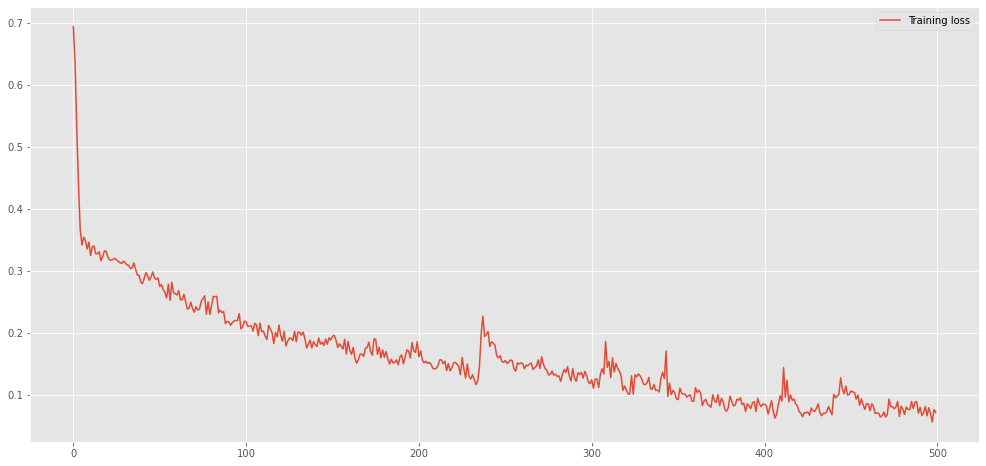

In [56]:
Loss_func = memory_bilstm.history["loss"] 
plt.plot(Loss_func, label= "Training loss")
plt.legend() # People may argue why I have schosen 1000 iterations, but the following diagram is self-descriptive!

In [57]:
bilstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 18, 1024)          2105344   
_________________________________________________________________
seq_self_attention_3 (SeqSel (None, None, 1024)        65601     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               557568    
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,733,730
Trainable params: 2,733,730
Non-trainable params: 0
____________________________________________

In [58]:
score = bilstm.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh 

[0.059599634259939194, 0.0057750786654651165]

<function matplotlib.pyplot.show(close=None, block=None)>

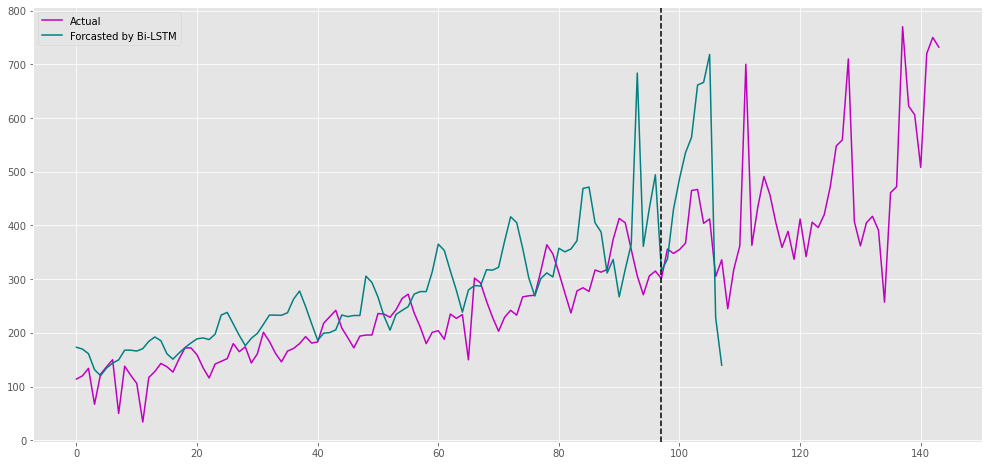

In [59]:
plt.plot(df, color="m")
plt.plot(pred, color="teal")
plt.legend(["Actual","Forcasted by Bi-LSTM"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show

### Gated Recurrent Unit (GRU)

In [62]:
gru = Sequential()
gru.add(GRU(units=512, return_sequences=True, activation ="LeakyReLU"))
gru.add(SeqSelfAttention(attention_activation='sigmoid'))
gru.add(GRU(units=64, return_sequences=False, activation ="LeakyReLU"))
gru.add(Dense(32, activation="LeakyReLU"))
gru.add(Dense(32, activation="LeakyReLU"))
gru.add(Dense(1, activation="LeakyReLU"))
gru.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_gru = gru.fit(X_train, Y_train , epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
2/2 [==============================] - 4s 105ms/step - loss: 0.6874 - logcosh: 0.3012
Epoch 2/500
2/2 [==============================] - 0s 105ms/step - loss: 0.6281 - logcosh: 0.2595
Epoch 3/500
2/2 [==============================] - 0s 107ms/step - loss: 0.5464 - logcosh: 0.2071
Epoch 4/500
2/2 [==============================] - 0s 105ms/step - loss: 0.4226 - logcosh: 0.1353
Epoch 5/500
2/2 [==============================] - 0s 111ms/step - loss: 0.3999 - logcosh: 0.1266
Epoch 6/500
2/2 [==============================] - 0s 108ms/step - loss: 0.3703 - logcosh: 0.1152
Epoch 7/500
2/2 [==============================] - 0s 107ms/step - loss: 0.3421 - logcosh: 0.1060
Epoch 8/500
2/2 [==============================] - 0s 106ms/step - loss: 0.3635 - logcosh: 0.1152
Epoch 9/500
2/2 [==============================] - 0s 105ms/step - loss: 0.3699 - logcosh: 0.1174
Epoch 10/500
2/2 [==============================] - 0s 104ms/step - loss: 0.3573 - logcosh: 0.1126
Epoch 11/500
2/2 [=

2/2 [==============================] - 0s 125ms/step - loss: 0.1657 - logcosh: 0.0380
Epoch 166/500
2/2 [==============================] - 0s 125ms/step - loss: 0.1604 - logcosh: 0.0369
Epoch 167/500
2/2 [==============================] - 0s 142ms/step - loss: 0.1580 - logcosh: 0.0382
Epoch 168/500
2/2 [==============================] - 0s 155ms/step - loss: 0.1629 - logcosh: 0.0367
Epoch 169/500
2/2 [==============================] - 0s 129ms/step - loss: 0.1517 - logcosh: 0.0337
Epoch 170/500
2/2 [==============================] - 0s 127ms/step - loss: 0.1721 - logcosh: 0.0374
Epoch 171/500
2/2 [==============================] - 0s 139ms/step - loss: 0.2089 - logcosh: 0.0535
Epoch 172/500
2/2 [==============================] - 0s 138ms/step - loss: 0.1828 - logcosh: 0.0395
Epoch 173/500
2/2 [==============================] - 0s 129ms/step - loss: 0.1861 - logcosh: 0.0435
Epoch 174/500
2/2 [==============================] - 0s 147ms/step - loss: 0.1753 - logcosh: 0.0398
Epoch 175/500


2/2 [==============================] - 0s 122ms/step - loss: 0.1283 - logcosh: 0.0172
Epoch 248/500
2/2 [==============================] - 0s 121ms/step - loss: 0.1489 - logcosh: 0.0264
Epoch 249/500
2/2 [==============================] - 0s 124ms/step - loss: 0.1365 - logcosh: 0.0215
Epoch 250/500
2/2 [==============================] - 0s 123ms/step - loss: 0.1612 - logcosh: 0.0300
Epoch 251/500
2/2 [==============================] - 0s 124ms/step - loss: 0.1428 - logcosh: 0.0208
Epoch 252/500
2/2 [==============================] - 0s 127ms/step - loss: 0.1435 - logcosh: 0.0242
Epoch 253/500
2/2 [==============================] - 0s 147ms/step - loss: 0.1386 - logcosh: 0.0221
Epoch 254/500
2/2 [==============================] - 0s 140ms/step - loss: 0.1456 - logcosh: 0.0237
Epoch 255/500
2/2 [==============================] - 0s 133ms/step - loss: 0.1361 - logcosh: 0.0184
Epoch 256/500
2/2 [==============================] - 0s 130ms/step - loss: 0.1690 - logcosh: 0.0346
Epoch 257/500


2/2 [==============================] - 0s 139ms/step - loss: 0.0997 - logcosh: 0.0127
Epoch 330/500
2/2 [==============================] - 0s 127ms/step - loss: 0.0902 - logcosh: 0.0114
Epoch 331/500
2/2 [==============================] - 0s 141ms/step - loss: 0.0935 - logcosh: 0.0111
Epoch 332/500
2/2 [==============================] - 0s 127ms/step - loss: 0.0923 - logcosh: 0.0115
Epoch 333/500
2/2 [==============================] - 0s 126ms/step - loss: 0.0845 - logcosh: 0.0104
Epoch 334/500
2/2 [==============================] - 0s 126ms/step - loss: 0.0951 - logcosh: 0.0111
Epoch 335/500
2/2 [==============================] - 0s 132ms/step - loss: 0.0848 - logcosh: 0.0106
Epoch 336/500
2/2 [==============================] - 0s 138ms/step - loss: 0.0851 - logcosh: 0.0102
Epoch 337/500
2/2 [==============================] - 0s 127ms/step - loss: 0.1039 - logcosh: 0.0130
Epoch 338/500
2/2 [==============================] - 0s 127ms/step - loss: 0.0975 - logcosh: 0.0114
Epoch 339/500


2/2 [==============================] - 0s 131ms/step - loss: 0.0964 - logcosh: 0.0111
Epoch 412/500
2/2 [==============================] - 0s 126ms/step - loss: 0.0774 - logcosh: 0.0092
Epoch 413/500
2/2 [==============================] - 0s 126ms/step - loss: 0.0829 - logcosh: 0.0107
Epoch 414/500
2/2 [==============================] - 0s 137ms/step - loss: 0.1086 - logcosh: 0.0133
Epoch 415/500
2/2 [==============================] - 0s 134ms/step - loss: 0.0773 - logcosh: 0.0085
Epoch 416/500
2/2 [==============================] - 0s 139ms/step - loss: 0.0947 - logcosh: 0.0103
Epoch 417/500
2/2 [==============================] - 0s 129ms/step - loss: 0.0771 - logcosh: 0.0091
Epoch 418/500
2/2 [==============================] - 0s 132ms/step - loss: 0.0735 - logcosh: 0.0089
Epoch 419/500
2/2 [==============================] - 0s 129ms/step - loss: 0.0750 - logcosh: 0.0089
Epoch 420/500
2/2 [==============================] - 0s 129ms/step - loss: 0.0726 - logcosh: 0.0083
Epoch 421/500


2/2 [==============================] - 0s 130ms/step - loss: 0.0476 - logcosh: 0.0058
Epoch 494/500
2/2 [==============================] - 0s 123ms/step - loss: 0.0577 - logcosh: 0.0067
Epoch 495/500
2/2 [==============================] - 0s 124ms/step - loss: 0.0562 - logcosh: 0.0061
Epoch 496/500
2/2 [==============================] - 0s 125ms/step - loss: 0.0518 - logcosh: 0.0062
Epoch 497/500
2/2 [==============================] - 0s 119ms/step - loss: 0.0534 - logcosh: 0.0060
Epoch 498/500
2/2 [==============================] - 0s 136ms/step - loss: 0.0600 - logcosh: 0.0067
Epoch 499/500
2/2 [==============================] - 0s 127ms/step - loss: 0.0575 - logcosh: 0.0065
Epoch 500/500
2/2 [==============================] - 0s 123ms/step - loss: 0.0594 - logcosh: 0.0063


In [63]:
pred_train = SC.inverse_transform(gru.predict(X_train))
pred_test = SC.inverse_transform(gru.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

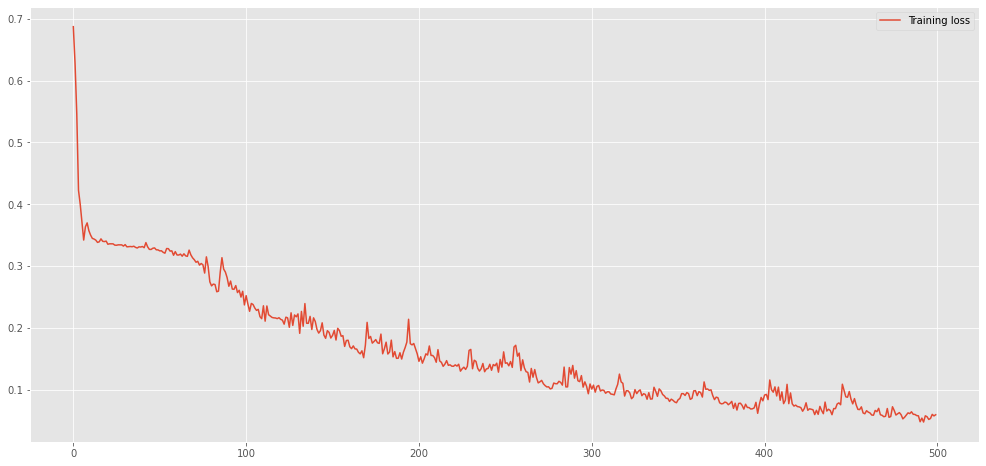

In [64]:
Loss_func = memory_gru.history["loss"] 
plt.plot(Loss_func, label= "Training loss")
plt.legend() 

In [65]:
gru.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 18, 512)           791040    
_________________________________________________________________
seq_self_attention_5 (SeqSel (None, None, 512)         32833     
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                110976    
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 938,018
Trainable params: 938,018
Non-trainable params: 0
________________________________________________

In [66]:
score = gru.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh 

[0.07069073617458344, 0.007528407499194145]

### <font color='red'> Still with the attention layer, it can be stated that (surprisingly) RNN performed best compared with LSTM, Bi-LSTM, and GRU! Attention layer does decrease the performance of all models!! </font>

<function matplotlib.pyplot.show(close=None, block=None)>

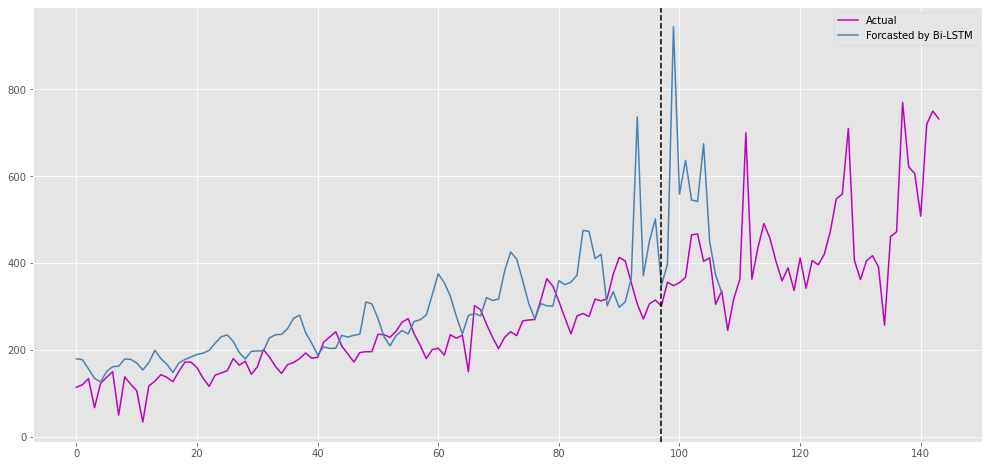

In [67]:
plt.plot(df, color="m")
plt.plot(pred, color="steelblue")
plt.legend(["Actual","Forcasted by GRU"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show